### 모듈 import

In [2]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.4.1


# 데이터 전처리

### 데이터셋 가져오기

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


### -1 ~ 1 사이로 정규화

In [6]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


### 데이터의 shape

In [7]:
train_x.shape

(60000, 28, 28)

### 채널 수에 대한 차원 만들기
- 딥러닝에서 이미지를 다루려면 **채널 수**에 대한 차원이 필요
- shape 마지막에 1을 추가해줌

In [8]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

### 첫 번째 데이터 어떻게 생겼는지 확인

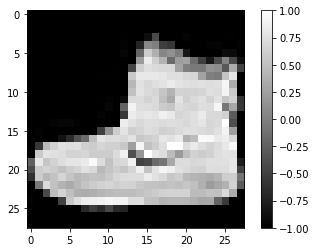

In [9]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

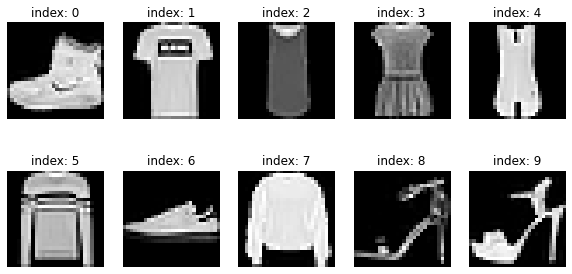

In [10]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off') # 격자 값 없애줌
plt.show()

plt.subplot(row, col, idx+1) 을 이용하여 여러개로 순회하며 plot할 수 있음

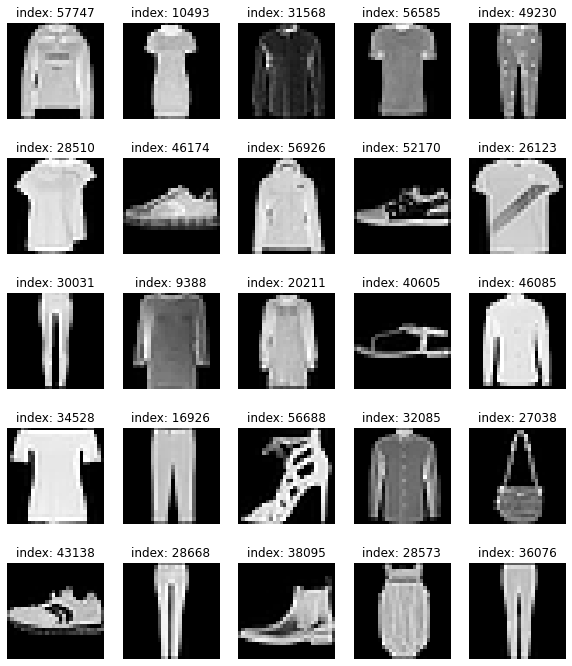

In [17]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

### 모델 학습

In [20]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [23]:
tf.data.Dataset.from_tensor_slices(train_x)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)